In [21]:
# 임포트

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import keras
import os
import numpy as np
from tensorflow.keras.applications import VGG16
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import matplotlib.pyplot as plt

In [3]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3)
                  )
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
# 기본 경로
base_dir ='../../어류 개체 촬영 영상/'
train_dir = os.path.join(base_dir,'Training')
validation_dir = os.path.join(base_dir, 'Validation')

train_dir_2614 = os.path.join(base_dir, 'Training_2614')
validation_dir_299 = os.path.join(base_dir , 'Validation_299')


# 훈련용 경로
train_dir_1 = os.path.join(train_dir , 'dtset_광어') # 광어
train_dir_2 = os.path.join(train_dir , 'dtset_우럭') # 우럭
train_dir_3 = os.path.join(train_dir , 'dtset_참돔') # 참돔
train_dir_4 = os.path.join(train_dir , 'dtset_감성돔') #감성돔
train_dir_5 = os.path.join(train_dir , 'dtset_돌돔') # 돌돔

# 검증용 경로
val_dir_1 = os.path.join(validation_dir , 'dtset_val_광어') # 광어
val_dir_2 = os.path.join(validation_dir , 'dtset_val_우럭') # 우럭
val_dir_3 = os.path.join(validation_dir , 'dtset_val_참돔') # 참돔
val_dir_4 = os.path.join(validation_dir , 'dtset_val_감성돔') # 감성돔
val_dir_5 = os.path.join(validation_dir , 'dtset_val_돌돔') # 돌돔

print(type(train_dir_1))
train_dir_1

<class 'str'>


'../../어류 개체 촬영 영상/Training\\dtset_광어'

In [10]:
train_1_fnames = os.listdir(train_dir_1)
print(len(train_1_fnames))

2614


In [30]:
# 훈련용 광어 개수가 2,614개로 가장 적으므로 숫자 맞춰주기

train_2_fnames = random.sample(os.listdir(train_dir_2),2614)
train_3_fnames = random.sample(os.listdir(train_dir_3),2614)
train_4_fnames = random.sample(os.listdir(train_dir_4),2614)
train_5_fnames = random.sample(os.listdir(train_dir_5),2614)

In [34]:
src2 = '../../어류 개체 촬영 영상/Training_2614/dtset_우럭_2614/'

for i in train_2_fnames:
    shutil.copy(train_dir_2+'/'+i , src2)




In [35]:
src3 = '../../어류 개체 촬영 영상/Training_2614/dtset_참돔_2614/'

for i in train_3_fnames:
    shutil.copy(train_dir_3+'/'+i , src3)
    
src4 = '../../어류 개체 촬영 영상/Training_2614/dtset_감성돔_2614/'

for i in train_4_fnames:
    shutil.copy(train_dir_4+'/'+i , src4)
    
src5 = '../../어류 개체 촬영 영상/Training_2614/dtset_돌돔_2614/'

for i in train_5_fnames:
    shutil.copy(train_dir_5+'/'+i , src5)

In [19]:
val_1_fnames = os.listdir(val_dir_1)
print(len(val_1_fnames))

299


In [36]:
# 훈련용 광어 개수가 299개로 가장 적으므로 숫자 맞춰주기

val_2_fnames = random.sample(os.listdir(val_dir_2),299)
val_3_fnames = random.sample(os.listdir(val_dir_3),299)
val_4_fnames = random.sample(os.listdir(val_dir_4),299)
val_5_fnames = random.sample(os.listdir(val_dir_5),299)

In [37]:
val_src2 = '../../어류 개체 촬영 영상/Validation_299/dtset_val_우럭_299/'
for i in val_2_fnames:
    shutil.copy(val_dir_2+'/'+i , val_src2)

val_src3 = '../../어류 개체 촬영 영상/Validation_299/dtset_val_참돔_299/'
for i in val_3_fnames:
    shutil.copy(val_dir_3+'/'+i , val_src3)

val_src4 = '../../어류 개체 촬영 영상/Validation_299/dtset_val_감성돔_299/'
for i in val_4_fnames:
    shutil.copy(val_dir_4+'/'+i , val_src4)
    
val_src5 = '../../어류 개체 촬영 영상/Validation_299/dtset_val_돌돔_299/'
for i in val_5_fnames:
    shutil.copy(val_dir_5+'/'+i , val_src5)    

In [14]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

train_generator = datagen.flow_from_directory(train_dir_2614,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='categorical')

val_generator = datagen.flow_from_directory(validation_dir_299,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='categorical')


Found 13070 images belonging to 5 classes.
Found 1495 images belonging to 5 classes.


In [15]:
print(train_generator.class_indices)
print(val_generator.class_indices)

{'dtset_감성돔_2614': 0, 'dtset_광어_2614': 1, 'dtset_돌돔_2614': 2, 'dtset_우럭_2614': 3, 'dtset_참돔_2614': 4}
{'dtset_val_감성돔_299': 0, 'dtset_val_광어_299': 1, 'dtset_val_돌돔_299': 2, 'dtset_val_우럭_299': 3, 'dtset_val_참돔_299': 4}


In [16]:
# block5_conv1 층만 미세조정 가능하도록 설정


conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-05),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    
    epochs=30,
    validation_data=val_generator,
    
)

Epoch 1/30
654/654 [==============================] - 779s 1s/step - loss: 0.6260 - accuracy: 0.2590 - val_loss: 0.2167 - val_accuracy: 0.2025
Epoch 2/30
654/654 [==============================] - 736s 1s/step - loss: 0.1461 - accuracy: 0.2044 - val_loss: 0.0705 - val_accuracy: 0.2102
Epoch 3/30
654/654 [==============================] - 736s 1s/step - loss: 0.0702 - accuracy: 0.2115 - val_loss: 0.0306 - val_accuracy: 0.2239
Epoch 4/30
654/654 [==============================] - 740s 1s/step - loss: 0.0440 - accuracy: 0.2348 - val_loss: 0.0207 - val_accuracy: 0.2618
Epoch 5/30
654/654 [==============================] - 733s 1s/step - loss: 0.0316 - accuracy: 0.2933 - val_loss: 0.0239 - val_accuracy: 0.2833
Epoch 6/30
654/654 [==============================] - 733s 1s/step - loss: 0.0275 - accuracy: 0.3374 - val_loss: 0.0210 - val_accuracy: 0.3522
Epoch 7/30
654/654 [==============================] - 736s 1s/step - loss: 0.0212 - accuracy: 0.3815 - val_loss: 0.0111 - val_accuracy: 0.3914

Text(0.5, 1.0, 'Train - Accuracy')

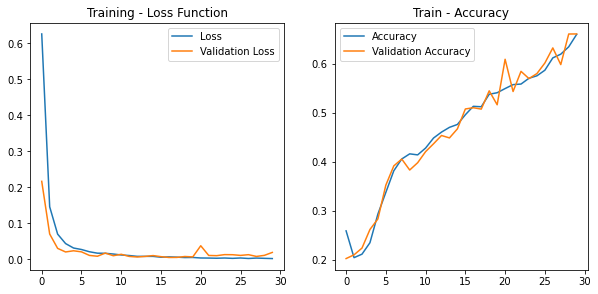

In [22]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')